In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

A standing wave on a string stretched between x = 0m and x = L = 1m, takes the initial form of

y(x; 0) = (70cm)(1.7(x/L)^2 - 0.7(x/L) - (x/L)^3)*ln(1 + x/L). 

Use a computational integration method to solve for the first 15 coeffcients of

y(x; t) = $\sum_{n}$ $A_n$*sin(n*$\pi$*x/L)*cos($\omega_n$t).

(No black-box integrations allowed, you must research and implement the integration yourself.
Rectangular integration is one.)

Make a plot that contains the following curves, overlayed on top of each other: (Don't forget labels!)

y(x; 0) = $\sum_{n = 0}^{5}$ $A_n$*sin(n*$\pi$x/L)

y(x; 0) = $\sum_{n = 0}^{10}$ $A_n$*sin(n*$\pi$x/L)

y(x; 0) = $\sum_{n = 0}^{15}$ $A_n$*sin(n*$\pi$x/L)

Make a second plot that overlays the dierence between the three approximations and the exact
value/expression.

BONUS: Given v = 10m/s, animate your approximate result over the time range 0 < t < 5s.
Choose an appropriate time step to ensure that the animation does not occur too quickly!

In [2]:
L = 1

To find A <sub>n</sub> :

In [3]:
def f(x, n):
    y0 = 0.7*(1.7*(x/L)**2 - 0.7*(x/L) - (x/L)**3)*np.log(1 + (x/L))
    return y0*np.sin(n*np.pi*x/L)

In [4]:
def riemann(n, a = 0, b = L, m = 100): # m = 1000 more effective, but sometimes overloads the server
    h = (b - a)/m
    s = 0
    for k in range(1, m+1):
        s += h*f(a + k*h, n)
    return s

In [5]:
coeff_list = []
for n in range(1, 16):
    An = 2*riemann(n)/L
    coeff_list.append(An)

coeff_list = np.array(coeff_list)
coeff_list

array([ -1.02047263e-02,  -8.57094357e-03,   4.86290587e-03,
        -6.66479002e-04,   1.18302948e-03,  -1.70306005e-04,
         4.45471619e-04,  -6.75990106e-05,   2.12446299e-04,
        -3.35787291e-05,   1.17155493e-04,  -1.91031554e-05,
         7.12526820e-05,  -1.19036319e-05,   4.64937926e-05])

Hence the first 15 coefficients are:

In [6]:
print("Hence the first 15 coefficients are: ", coeff_list)

Hence the first 15 coefficients are:  [ -1.02047263e-02  -8.57094357e-03   4.86290587e-03  -6.66479002e-04
   1.18302948e-03  -1.70306005e-04   4.45471619e-04  -6.75990106e-05
   2.12446299e-04  -3.35787291e-05   1.17155493e-04  -1.91031554e-05
   7.12526820e-05  -1.19036319e-05   4.64937926e-05]


Now to plot the exact initial condition and aproximated initial conditions:

In [7]:
x_array = np.linspace(0, L, 1e5)
y0 = 0.7*(1.7*(x_array/L)**2 - 0.7*(x_array/L) - (x_array/L)**3)*np.log(1 + (x_array/L))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [8]:
def adder(n, x):
    s = np.zeros(len(x))
    for i in range(1, n+1):
        s += coeff_list[i-1]*np.sin(i*np.pi*x/L)
    return s

In [9]:
y5 = adder(5, x_array)
y10 = adder(10, x_array)
y15 = adder(15, x_array)

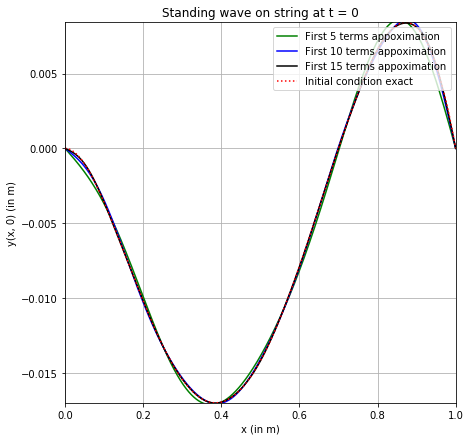

In [10]:
plt.close()

fig1, ax = plt.subplots(figsize= (7, 7))

plt.plot(x_array, y5, 'g-', label= 'First 5 terms appoximation')
plt.plot(x_array, y10, 'b-', label= 'First 10 terms appoximation')
plt.plot(x_array, y15, 'k-', label= 'First 15 terms appoximation')
plt.plot(x_array, y0, 'r:', label= 'Initial condition exact')

plt.ylim(min(y0), max(y0))
plt.xlim(0, L)
plt.xlabel("x (in m)")
plt.ylabel("y(x, 0) (in m)")

plt.title("Standing wave on string at t = 0")
plt.grid(True)
plt.legend(loc=1, prop={'size': 10})


plt.show()

Now to plot the differential: 

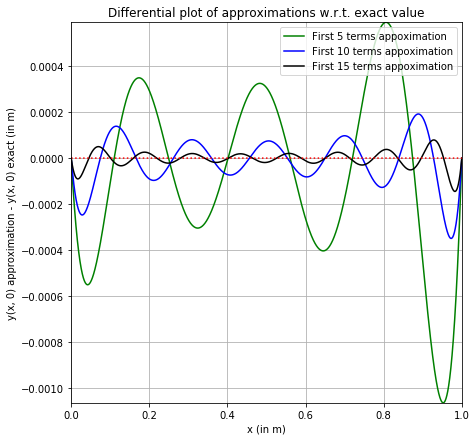

In [11]:
plt.close()

fig2, ax = plt.subplots(figsize= (7, 7))

plt.plot(x_array, y5 - y0, 'g-', label= 'First 5 terms appoximation')
plt.plot(x_array, y10 - y0, 'b-', label= 'First 10 terms appoximation')
plt.plot(x_array, y15 - y0, 'k-', label= 'First 15 terms appoximation')
plt.plot(x_array, np.zeros(len(x_array)), 'r:')

plt.ylim(min(y5 - y0), max(y5 - y0))
plt.xlim(0, L)
plt.xlabel("x (in m)")
plt.ylabel("y(x, 0) approximation - y(x, 0) exact (in m)")

plt.title("Differential plot of approximations w.r.t. exact value")
plt.grid(True)
plt.legend(loc=1, prop={'size': 10})


plt.show()

Now to animate the best approximation of y(x, t):

In [16]:
import matplotlib.animation as animation

In [13]:
v = 10
def adder_modified(t, n, x = x_array):
    s = np.zeros(len(x))
    for i in range(1, n+1):
        s += coeff_list[i-1]*np.sin(i*np.pi*x/L)*np.cos(i*np.pi*v*t/L)
    return s

<IPython.core.display.Javascript object>


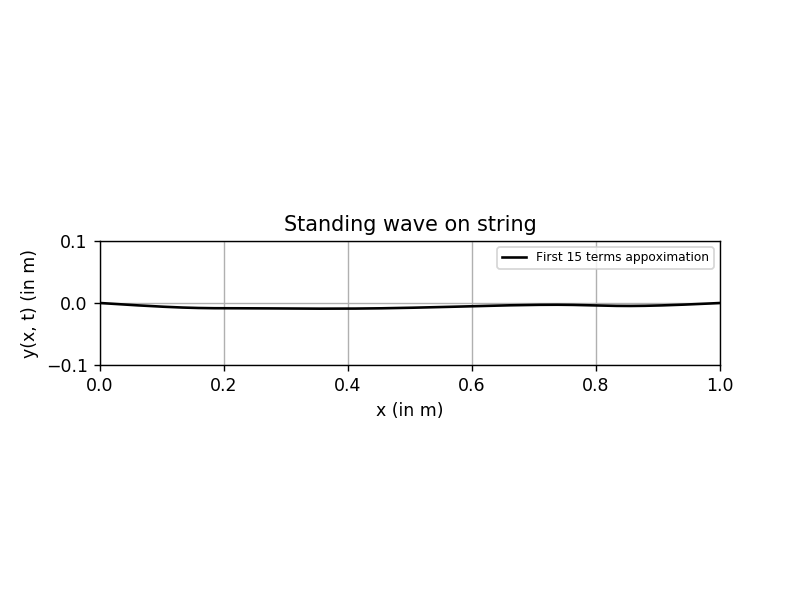

In [17]:
fig, ax = plt.subplots()

#initialize the parameter you are going to change in the animation
t = [0.0]

line, = ax.plot(x_array, adder_modified(t[-1], 15), 'k-', label = "First 15 terms appoximation")


ax.set_aspect('equal')
ax.legend(fontsize = 7)
ax.set_xlim(0, L)
ax.set_ylim(-0.1, 0.1)
ax.set_xlabel('x (in m)')
ax.set_ylabel('y(x, t) (in m)')
ax.set_title('Standing wave on string')
ax.grid(True)

#Initialize the animation function by setting initial position for everything
def init():
    line.set_xdata(x_array)
    line.set_ydata(adder_modified(t[-1], 15))
    return line,


#the animate function
def animate(i):
    t.append(i/200)
    line.set_xdata(x_array)
    line.set_ydata(adder_modified(t[-1], 15))
    return line,

#interval is ms delay between frames
#blit makes sure it doesn't start over everytime
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=100, frames = 1000, blit=True )

plt.show()